## Data visualization and Modeling 

In [50]:
import warnings
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

In [51]:
df = pd.read_csv(r'D:\專案\Projects\Used Cars\Code\final_cleaned.csv').drop('index', axis=1, errors='ignore')

In [52]:
# # Recheck the dataset
# ydata_profiling.ProfileReport(df)

### New insights with this dataset
－The data needs additional cleaning.  
－Remove columns with too many null values, such as "condition", "cylinders", "size", and "paint_color".  
－Remove columns with not useful data.  
－Replace the value "pickup" with "truck" in the "type" column.  

－Remove rows with null values in the "type", "drive", "transmission", and "fuel" columns.  
－Remove rows with price under 1000 and year over 2020 (which is not possible).  


In [53]:
df_old = df.copy()

# Remove multiple columns at once
df = df.drop(columns=['title_status',
                      'condition',
                      'cylinders',
                      'size',
                      'paint_color',
                      'posting_date',
                      'state',
                      'region',
                      'combined',
                      'VIN'])

# Remove rows with null values in the specified columns
df = df.dropna(subset=['type', 'drive', 'transmission', 'fuel'])

# Change the value of the "type" column from "pickup" to "truck"
df['type'] = df['type'].replace('pickup', 'truck')

# Remove rows with price under 1000 and year over 2020
df = df[(df['price'] >= 1000) & (df['year'] <= 2020)]

new_df = df.copy()
print(df_old.shape)
print(df.shape)


(9200, 20)
(6340, 10)


In [54]:
# Reset index
df_reset = df.reset_index(drop=True)

In [55]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         6340 non-null   int64 
 1   year          6340 non-null   int64 
 2   manufacturer  6340 non-null   object
 3   model         6340 non-null   object
 4   fuel          6340 non-null   object
 5   odometer      6340 non-null   int64 
 6   transmission  6340 non-null   object
 7   drive         6340 non-null   object
 8   type          6340 non-null   object
 9   car_msrp      6340 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 495.4+ KB


In [56]:
df_reset.head(10)

,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,car_msrp
0,18951,1951,ford,custom,gas,46016,manual,rwd,coupe,1515
1,15000,1953,jeep,willy's cj3-a,gas,42000,manual,4wd,offroad,1395
2,15000,1954,chevrolet,powerglide,gas,88056,automatic,rwd,sedan,22680
3,17000,1955,chevrolet,pickup,gas,99999,manual,rwd,truck,13125
4,36500,1957,chevrolet,3100 pickup,gas,99999,automatic,4wd,truck,43635
5,27000,1961,mini,cooper,gas,10,manual,fwd,coupe,33195
6,22000,1963,ford,unibody pickup,gas,43760,automatic,4wd,truck,2019
7,21500,1965,mercedes-benz,benz 190c,gas,354,automatic,rwd,sedan,5398
8,45000,1966,ford,mustang gt,gas,59000,automatic,rwd,coupe,2759
9,39750,1966,chevrolet,impala ss,gas,122300,automatic,rwd,coupe,29795


### Data Visualization

In [57]:
colors_10_1 = sns.color_palette("Spectral", 10)
colors_10_2 = sns.color_palette("Set3", 10)
colors_5 = sns.color_palette('Accent', 5)
colors_Spectral = sns.color_palette("Spectral", 10)
colors_Set2 = sns.color_palette("Set2")

<Axes: title={'center': 'Bottom 10 Brands'}, xlabel='Brand', ylabel='Count'>

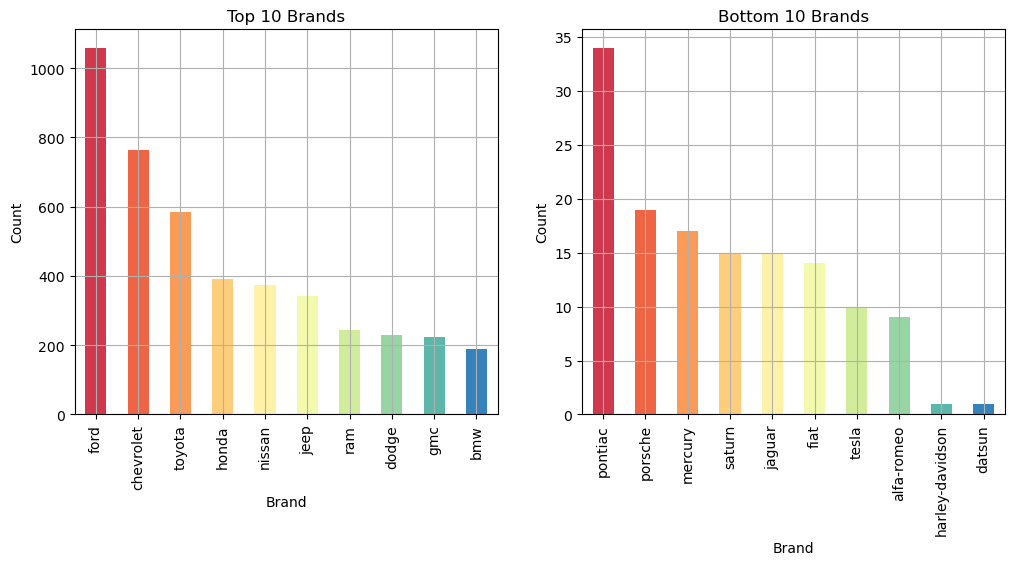

In [58]:
#Top 10 Brands and Bottom 10 Brands

%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df['manufacturer'].value_counts().head(10).plot(kind='bar', title='Top 10 Brands', color=colors_10_1, ax=axes[0], xlabel='Brand', ylabel='Count', grid=True)
df['manufacturer'].value_counts().tail(10).plot(kind='bar', title='Bottom 10 Brands', color=colors_10_1, ax=axes[1], xlabel='Brand', ylabel='Count', grid=True)

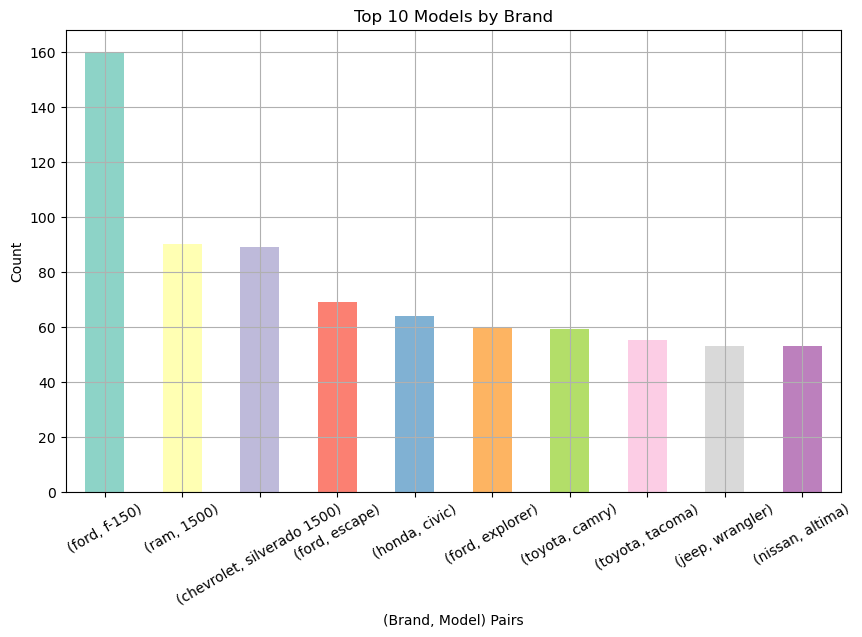

In [59]:
# Top 10 Models by Brand

group_by_brand = df.groupby('manufacturer')['model'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))  
group_by_brand.head(10).plot(kind='bar', grid=True, rot=30, xlabel="(Brand, Model) Pairs", ylabel='Count', title='Top 10 Models by Brand', color=colors_10_2)
plt.show()

<Axes: title={'center': 'No. of Cars by Fuel Type'}, xlabel='Fuel Type', ylabel='Count'>

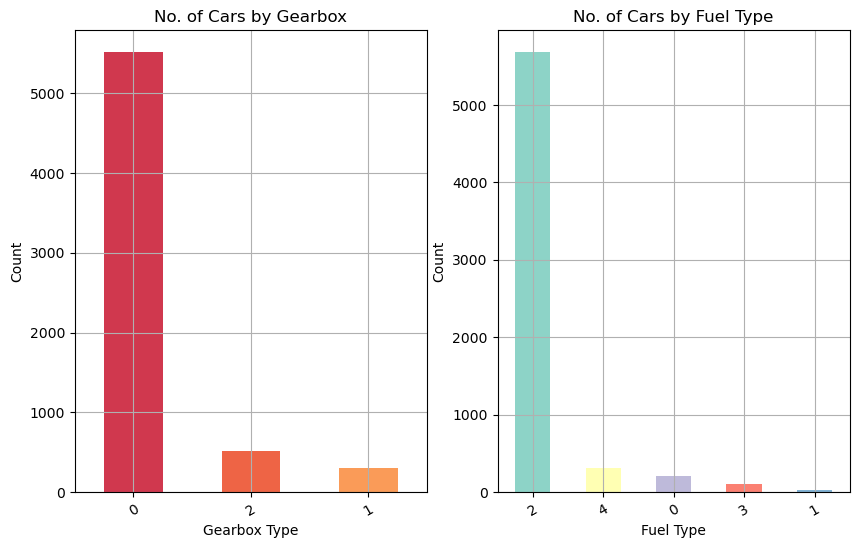

In [151]:
# Grouped by Gearbox, Fuel and Condition

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

df['transmission'].value_counts().plot(kind='bar', ax=axes[0], color=colors_10_1, title='No. of Cars by Gearbox', xlabel='Gearbox Type', ylabel='Count', rot=30, grid=True)
df['fuel'].value_counts().plot(kind='bar', ax=axes[1], color=colors_10_2, title='No. of Cars by Fuel Type', xlabel='Fuel Type', ylabel='Count', rot=30, grid=True)

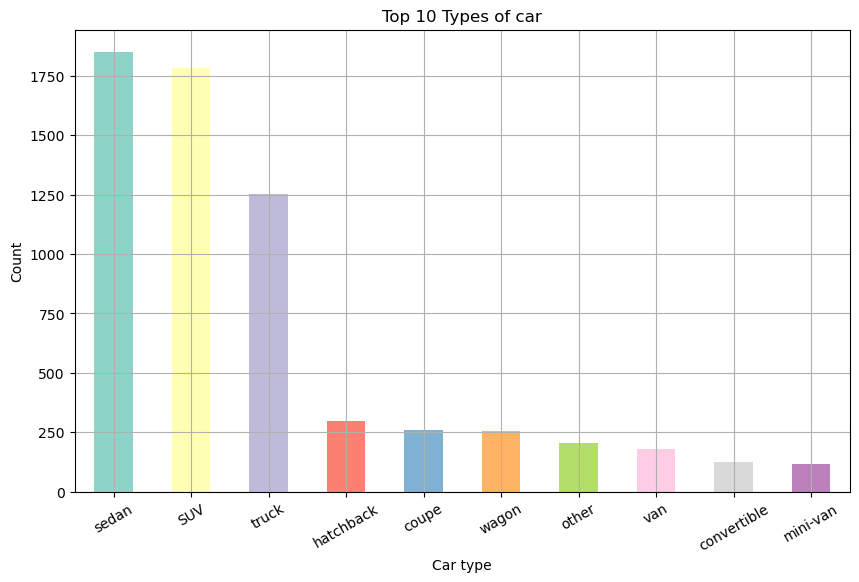

In [61]:
# Top 10 Types of car

group_by_vehicle_type = df['type'].value_counts()
plt.figure(figsize=(10, 6))  

group_by_vehicle_type.head(10).plot(kind='bar', grid=True, rot=30, xlabel="Car type", ylabel='Count', title='Top 10 Types of car', color=colors_10_2)
plt.show()

### Modeling
－Add a new column for the age of the car. Then drop the 'year' column.  
－Convert categorical values to numerical (using LabelEncoder).  
－Z-Score Standardization on column 'odometer','car_msrp','age'  
－Split the data with a ratio of %70, %15, and %15.  


In [62]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

from tqdm import tqdm
from colorama import Fore, Back, Style

In [63]:
# Add the 'age' column
current_year = 2024
df['age'] = current_year - df_reset['year']
df['age'] = df['age'].fillna(0)
df['age'] = df['age'].astype(int)

# Remove the 'year' column
df = df.drop('year', axis=1)

# Categorical to Numerical
categorical_features = ['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'type']
le = LabelEncoder()

for categorical_feature in categorical_features:
    df[categorical_feature] = le.fit_transform(df[categorical_feature])

In [64]:
df.head(10)

,price,manufacturer,model,fuel,odometer,transmission,drive,type,car_msrp,age
3,18951,11,610,2,46016,1,2,3,1515,69
4,15000,18,2133,2,42000,1,0,6,1395,67
5,15000,6,1516,2,88056,0,2,8,22680,63
6,17000,6,1506,2,99999,1,2,9,13125,61
8,36500,6,103,2,99999,0,0,9,43635,58
9,27000,26,524,2,10,1,1,3,33195,58
11,22000,11,2089,2,43760,0,0,9,2019,55
15,21500,24,315,2,354,0,2,8,5398,53
18,45000,11,1393,2,59000,0,2,3,2759,50
20,39750,6,1167,2,122300,0,2,3,29795,44


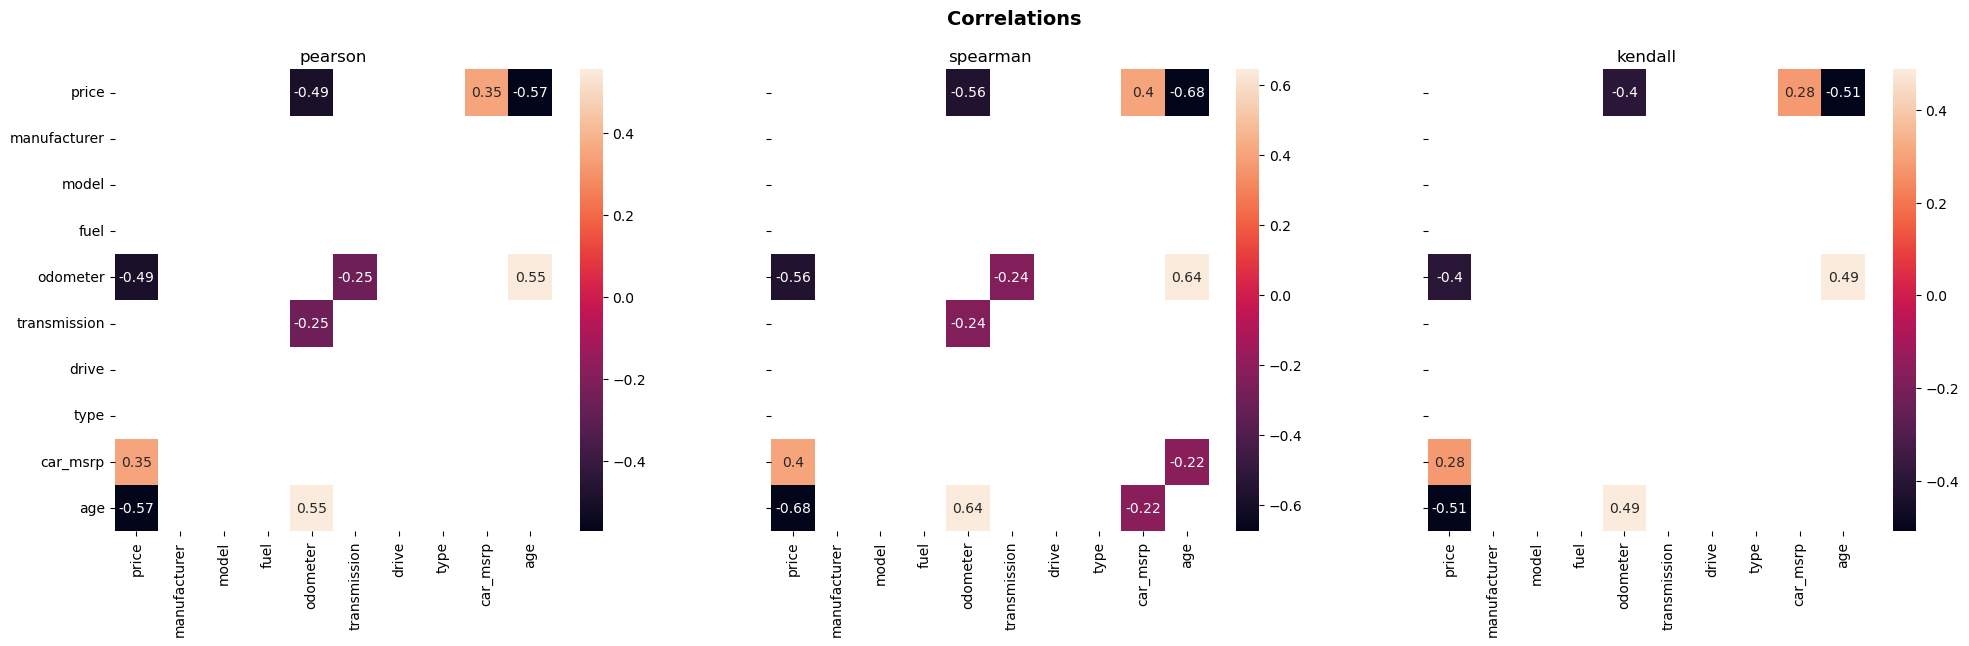

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)
fig.suptitle('Correlations', fontweight='bold', fontsize='14')
methods = ['pearson', 'spearman', 'kendall']

for i in range(3):
    corr = df.corr(method=methods[i])
    corr = corr[((corr >= 0.2) | (corr <= -0.2)) & (corr != 1)]
    sns.heatmap(corr, annot=True, ax=axes[i])
    axes[i].set_title(f"{methods[i]}")

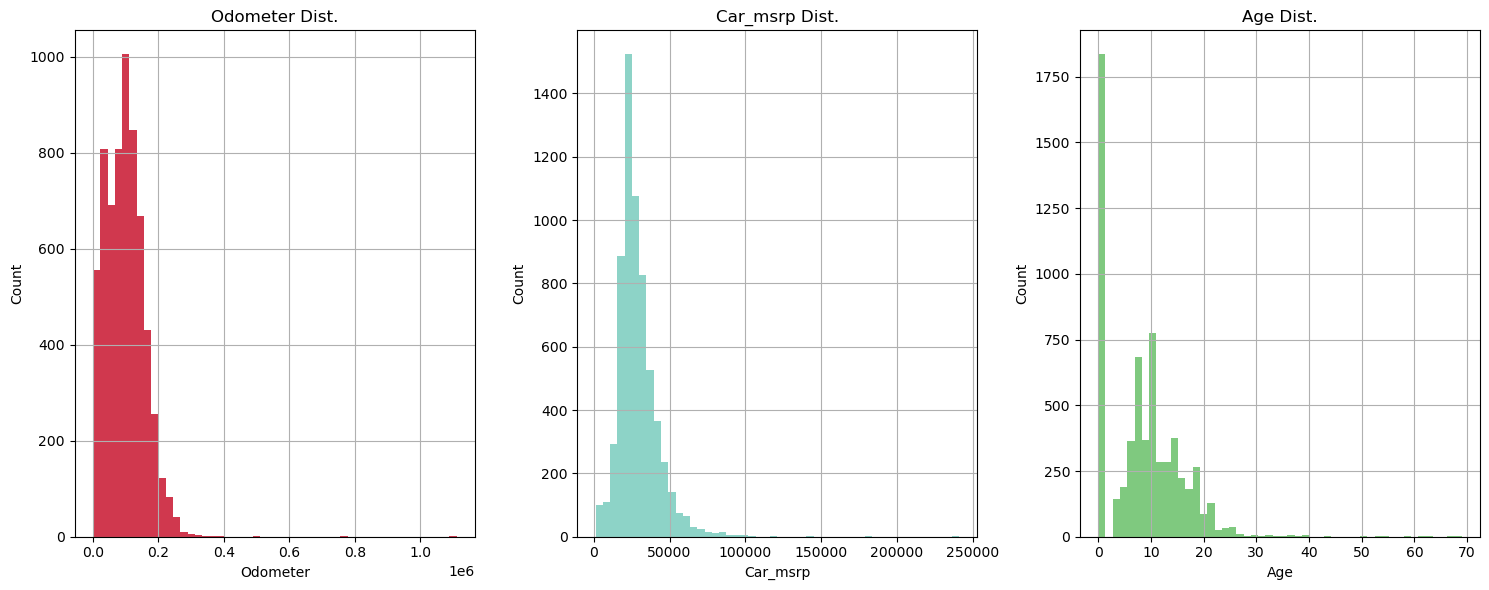

In [66]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

df['odometer'].plot(kind='hist', ax=axes[0], color=colors_10_1, title='Odometer Dist.', xlabel='Odometer', ylabel='Count', grid=True, bins=50)
df['car_msrp'].plot(kind='hist', ax=axes[1], color=colors_10_2, title='Car_msrp Dist.', xlabel='Car_msrp', ylabel='Count', grid=True, bins=50)
df['age'].plot(kind='hist', ax=axes[2], color=colors_5, title='Age Dist.', xlabel='Age', ylabel='Count', grid=True, bins=50)

plt.tight_layout()
plt.show()

The data in these three columns do not follow a normal distribution.  
So they need to be transformed using the Box-Cox method.  
After that, we can apply z-score standardization.  

In [67]:
# Box-Cox Transformation
from scipy import stats

# Replace all 0s in the 'age' column with 1
df['age'] = df['age'].replace(0, 1)

# Apply Box-Cox transformation to each variable separately
df['odometer_boxcox'], lambda_odometer = stats.boxcox(df['odometer'])
df['car_msrp_boxcox'], lambda_car_msrp = stats.boxcox(df['car_msrp'])
df['age_boxcox'], lambda_age = stats.boxcox(df['age'])

In [68]:
# Subtract price for target
features = df.drop(['price'], axis=1)
target = df['price']    

# Apply Z-score standardization
scaler = StandardScaler()
numerical_features = ['odometer_boxcox', 'car_msrp_boxcox', 'age_boxcox']
features[numerical_features] = scaler.fit_transform(features[numerical_features])

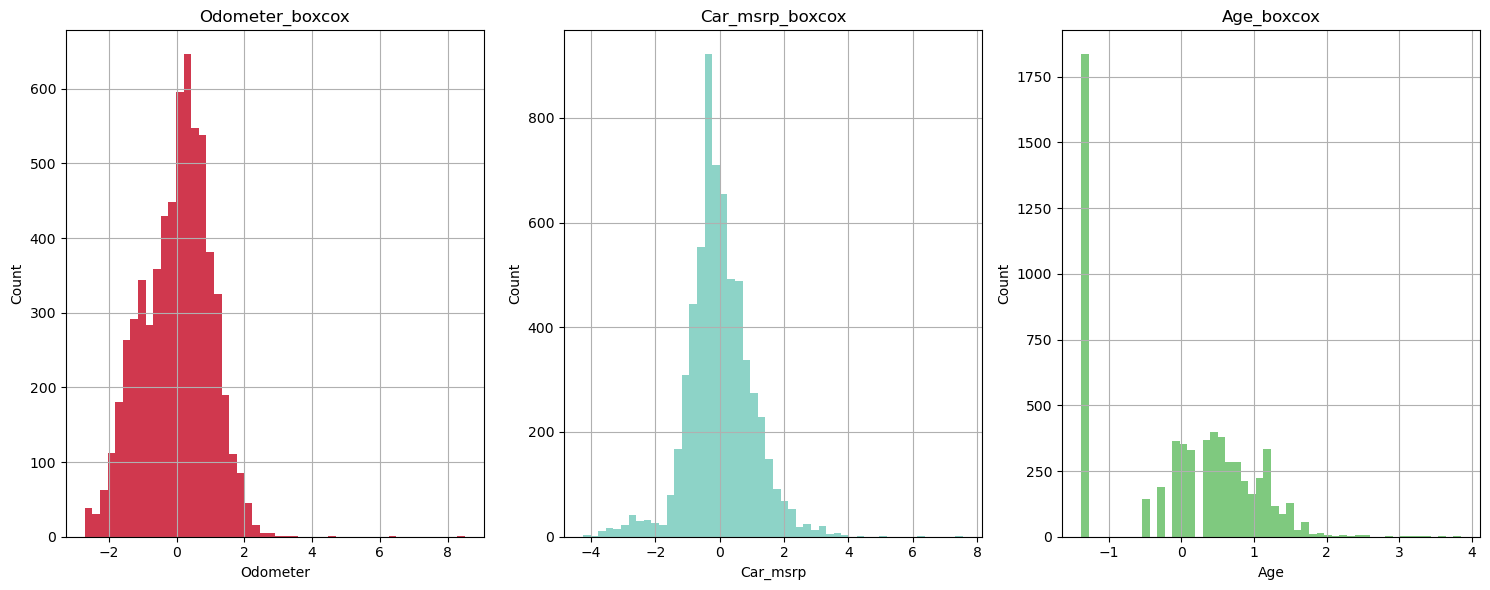

In [69]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

features['odometer_boxcox'].plot(kind='hist', ax=axes[0], color=colors_10_1, title='Odometer_boxcox', xlabel='Odometer', ylabel='Count', grid=True, bins=50)
features['car_msrp_boxcox'].plot(kind='hist', ax=axes[1], color=colors_10_2, title='Car_msrp_boxcox', xlabel='Car_msrp', ylabel='Count', grid=True, bins=50)
features['age_boxcox'].plot(kind='hist', ax=axes[2], color=colors_5, title='Age_boxcox', xlabel='Age', ylabel='Count', grid=True, bins=50)

plt.tight_layout()
plt.show()

In [70]:
# Remove the 'odometer','car_msrp','age' column
features = features.drop(['odometer', 'car_msrp', 'age'], axis=1)
features.head(10)

,manufacturer,model,fuel,transmission,drive,type,odometer_boxcox,car_msrp_boxcox,age_boxcox
3,11,610,2,1,2,3,-0.841664,-4.045582,3.850995
4,18,2133,2,1,0,6,-0.935215,-4.109881,3.777734
5,6,1516,2,0,2,8,-0.018280,-0.396013,3.627072
6,6,1506,2,1,2,9,0.181427,-1.448121,3.549529
8,6,103,2,0,0,9,0.181427,1.172037,3.430225
9,26,524,2,1,1,3,-2.692035,0.471006,3.430225
11,11,2089,2,0,0,9,-0.893756,-3.806105,3.307063
15,24,315,2,0,2,8,-2.587766,-2.767208,3.222643
18,11,1393,2,0,2,3,-0.561277,-3.515620,3.092256
20,6,1167,2,0,2,3,0.528273,0.212695,2.816253


## Different models approach
－1.Conventional ML methods for regression  
－2.Deep Neural Network  
－3.XAI using SHAP  
－4.Ensembling  


### 1.Linear Regression
－Regression Models: Decision Tree, Random Forest, Extra Trees, AdaBoost, XGBoost, CatBoost, and KNeighbors  
－Metrics: MSE, MAE, and R2  
－Cross-validation

In [143]:
# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.2, random_state=15)
print(f"Train Shape: {X_train.shape}\nTest Shape: {X_test.shape}")

Train Shape: (5072, 9)
Test Shape: (1268, 9)


In [72]:
scores_metric = {"R2-Score":make_scorer(r2_score),
                 "MAE":make_scorer(mean_absolute_error),
                 "MSE":make_scorer(mean_squared_error)}

In [73]:
def score_vis(score):
    
    names = ['Decision Tree', 'Random Forest', 'Extra Trees','AdaBoost', 'XGBoost', 'CatBoost', 'KNN']

    plt.rcParams['figure.figsize']=20,8
    ax = sns.barplot(x=names, y=score, palette = "plasma", saturation =2.0)
    
    plt.xlabel('Model', fontsize = 20 )
    plt.ylabel('R2-Score(%)', fontsize = 20)
    plt.title('Model Performance Comparison - Test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize='x-large')
        
    plt.show()

In [74]:
def trainer(X_train, y_train, X_test, y_test):
    
    models= [['Decision Tree', DecisionTreeRegressor()],
             ['Random Forest', RandomForestRegressor(n_estimators=124)],
             ['Extra Trees', ExtraTreesRegressor(n_estimators=124)],
             ['AdaBoost', AdaBoostRegressor(loss='square', n_estimators=1000)],
             ['XGBoost', XGBRegressor(tree_method='hist', n_estimators=1000)],
             ['CatBoost', CatBoostRegressor(logging_level='Silent')],
             ['KNN', KNeighborsRegressor(weights='distance')]]

    scores = []
    
    print(Back.RED + Fore.BLACK + Style.BRIGHT + '⁜⁜ STARTING THE PROCESS... ⁜⁜\n\n')
    print(Back.RESET)
    
    for model_name, model in models:
        
        print(Fore.LIGHTRED_EX + 'Cross validating the ' + model_name + ' model...\n')
        model = model
        result = cross_validate(model, X_train, y_train, cv=5, verbose=1, scoring=scores_metric)
        
        for key, value in result.items():
            print(f"{Fore.BLUE}{key}: {Fore.RED}{np.mean(value):.3f} {Fore.BLUE}+- {Fore.RED}{np.std(value):.3f}")
        
        print(Fore.LIGHTGREEN_EX + '\nTraining...')
        model.fit(X_train, y_train)
        
        print(Fore.LIGHTGREEN_EX + 'Predicting...\n')
        pred = model.predict(X_test)
        
        scores.append(r2_score(y_test, pred))
        print(f"{Fore.BLUE}{model_name} Test R2-Score: {Fore.RED}{r2_score(y_test, pred):.3f}")
        print(f"{Fore.BLUE}{model_name} Test MAE:      {Fore.RED}{mean_absolute_error(y_test, pred):.3f}")

        print('\n' + Fore.BLACK + Back.WHITE + '⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜\n' + Back.RESET)
    
    print('\n\n\n' + Back.RED + Fore.BLACK + Style.BRIGHT + '⁜⁜ PROCESS COMPLETED! ⁜⁜')
    
    return scores

In [75]:
scores = trainer(X_train, y_train, X_test, y_test)

⁜⁜ STARTING THE PROCESS... ⁜⁜



Cross validating the Decision Tree model...

fit_time: 0.033 +- 0.009
score_time: 0.005 +- 0.007
test_R2-Score: 0.588 +- 0.025
test_MAE: 4775.454 +- 121.619
test_MSE: 47999597.371 +- 1775631.602

Training...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Predicting...

Decision Tree Test R2-Score: 0.508
Decision Tree Test MAE:      4873.513

⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

Cross validating the Random Forest model...



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.1s finished


fit_time: 2.994 +- 0.252
score_time: 0.034 +- 0.003
test_R2-Score: 0.789 +- 0.024
test_MAE: 3421.366 +- 119.504
test_MSE: 24574472.036 +- 3023370.287

Training...
Predicting...

Random Forest Test R2-Score: 0.771
Random Forest Test MAE:      3447.499

⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

Cross validating the Extra Trees model...



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.8s finished


fit_time: 1.324 +- 0.091
score_time: 0.040 +- 0.006
test_R2-Score: 0.784 +- 0.019
test_MAE: 3464.258 +- 70.439
test_MSE: 25210431.579 +- 2410080.322

Training...
Predicting...

Extra Trees Test R2-Score: 0.774
Extra Trees Test MAE:      3444.886

⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

Cross validating the AdaBoost model...



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.5s finished


fit_time: 3.737 +- 0.108
score_time: 0.181 +- 0.013
test_R2-Score: 0.509 +- 0.062
test_MAE: 6361.657 +- 508.412
test_MSE: 57018876.037 +- 5822150.728

Training...
Predicting...

AdaBoost Test R2-Score: 0.401
AdaBoost Test MAE:      7039.160

⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

Cross validating the XGBoost model...



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished


fit_time: 1.590 +- 0.050
score_time: 0.010 +- 0.002
test_R2-Score: 0.792 +- 0.016
test_MAE: 3381.711 +- 79.682
test_MSE: 24276627.413 +- 1969185.593

Training...
Predicting...

XGBoost Test R2-Score: 0.789
XGBoost Test MAE:      3320.876

⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

Cross validating the CatBoost model...



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.0s finished


fit_time: 2.803 +- 0.072
score_time: 0.009 +- 0.002
test_R2-Score: 0.827 +- 0.020
test_MAE: 3045.017 +- 96.006
test_MSE: 20194553.314 +- 2614733.289

Training...
Predicting...

CatBoost Test R2-Score: 0.814
CatBoost Test MAE:      3040.409

⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜

Cross validating the KNN model...

fit_time: 0.010 +- 0.001
score_time: 0.005 +- 0.000
test_R2-Score: 0.582 +- 0.033
test_MAE: 4838.107 +- 155.728
test_MSE: 48741288.408 +- 4133518.333

Training...
Predicting...

KNN Test R2-Score: 0.591
KNN Test MAE:      4618.222

⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜⁜




⁜⁜ PROCESS COMPLETED! ⁜⁜


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


The best model for performance is CatBoost.

In [148]:
# Testing CatBoost with group kfold

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GroupKFold
import numpy as np

def trainer_with_group_kfold(X, y, groups, n_splits=42):
    # Initialize GroupKFold
    gkf = GroupKFold(n_splits=n_splits)
    
    mse_scores = []
    mae_scores = []
    r2_scores = []
    
    # Perform GroupKFold cross-validation
    for train_index, test_index in gkf.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Initialize CatBoostRegressor
        model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)
    
    # Calculate average evaluation metrics
    mean_mse = np.mean(mse_scores)
    mean_mae = np.mean(mae_scores)
    mean_r2 = np.mean(r2_scores)
    
    return {'mse': mean_mse, 'mae': mean_mae, 'r2': mean_r2}


X = X_train
y = y_train
groups = np.random.randint(0, 42, 5072)  # Group labels for 5072 samples, assuming 42 groups

# Use the trainer_with_group_kfold function
scores = trainer_with_group_kfold(X, y, groups)

print("Model evaluation results:")
print(f"MSE: {scores['mse']:.2f}")
print(f"MAE: {scores['mae']:.2f}")
print(f"R2: {scores['r2']:.2f}")

模型評估結果:
MSE: 19346350.99
MAE: 2964.84
R2: 0.83


### 2.DNN
General Overview:  
A DNN with the following number of neurons: 64,32,1  
Dropout with a probability of 0.2  
Swish activiation function for the hidden layers  
A Linear activation function for the output layer  
Loss: MSE, Metric: MAE  
Adam optimizer with the 0.01 learning rate  
Epoch: 400, Batch Size: 128
Saving checkpoints based on the validation MAE  

In [77]:
features.head(10)

,manufacturer,model,fuel,transmission,drive,type,odometer_boxcox,car_msrp_boxcox,age_boxcox
3,11,610,2,1,2,3,-0.841664,-4.045582,3.850995
4,18,2133,2,1,0,6,-0.935215,-4.109881,3.777734
5,6,1516,2,0,2,8,-0.018280,-0.396013,3.627072
6,6,1506,2,1,2,9,0.181427,-1.448121,3.549529
8,6,103,2,0,0,9,0.181427,1.172037,3.430225
9,26,524,2,1,1,3,-2.692035,0.471006,3.430225
11,11,2089,2,0,0,9,-0.893756,-3.806105,3.307063
15,24,315,2,0,2,8,-2.587766,-2.767208,3.222643
18,11,1393,2,0,2,3,-0.561277,-3.515620,3.092256
20,6,1167,2,0,2,3,0.528273,0.212695,2.816253


In [114]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=666, train_size=0.85)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=666, train_size=0.8235)

In [79]:
print(f'{Fore.BLUE}X_train Shape: {Fore.GREEN}{X_train.shape}')
print(f'{Fore.BLUE}y_train Shape: {Fore.GREEN}{y_train.shape}')

print(f'{Fore.RED}{Back.LIGHTWHITE_EX}--'*13)

print(f'{Back.RESET}{Fore.BLUE}X_test Shape: {Fore.GREEN}{X_test.shape}')
print(f'{Fore.BLUE}y_test Shape: {Fore.GREEN}{y_test.shape}')

print(f'{Fore.RED}{Back.LIGHTWHITE_EX}--'*13)

print(f'{Back.RESET}{Fore.BLUE}X_val Shape:  {Fore.GREEN}{X_val.shape}')
print(f'{Fore.BLUE}y_val Shape:  {Fore.GREEN}{y_val.shape}')

X_train Shape: (4437, 9)
y_train Shape: (4437,)
--------------------------
X_test Shape: (951, 9)
y_test Shape: (951,)
--------------------------
X_val Shape:  (952, 9)
y_val Shape:  (952,)


In [80]:
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from colorama import Fore, Style

# Build the model
model = Sequential()

# First layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='swish'))
model.add(Dropout(0.05))
# Second layer
model.add(Dense(32, activation='swish'))
model.add(Dropout(0.05))
# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=Adam(learning_rate=0.01),
              metrics=['mean_absolute_error'])

# Train the model
epoch = 400
batch_size = 128
mc = ModelCheckpoint('./best_model.keras', monitor='val_mean_absolute_error', mode='min', verbose=1, save_best_only=True)
# lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=epoch,
            callbacks=[mc])

# Evaluate the model
model = load_model(r'D:\專案\Projects\Used Cars\Code\best_model.keras')
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

result_str = (
    f"{Fore.BLUE}DNN - Test set\n\n"
    f"{Fore.BLUE}MSE: {Fore.RED}{mse:.2f}\n"
    f"{Fore.BLUE}MAE: {Fore.RED}{mae:.2f}\n"
    f"{Fore.BLUE}R2: {Fore.RED}{r2:.2f}"
)
print(result_str)

c:\Users\no\anaconda3\envs\0616\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 343747232.0000 - mean_absolute_error: 15206.9590 
Epoch 1: val_mean_absolute_error improved from inf to 10373.74609, saving model to ./best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 327549152.0000 - mean_absolute_error: 14711.8145 - val_loss: 180992960.0000 - val_mean_absolute_error: 10373.7461
Epoch 2/400
30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183297488.0000 - mean_absolute_error: 10241.1309
Epoch 2: val_mean_absolute_error improved from 10373.74609 to 10284.08398, saving model to ./best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 182358784.0000 - mean_absolute_error: 10233.2109 - val_loss: 172943440.0000 - val_mean_absolute_error: 10284.0840
Epoch 3/400
25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170918496.0000 - mean_absolute_error: 10079.9873 
Epoch 3: val_mean_absolute_error improved from 10284.08398 to 9562.34473, saving model to ./best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 

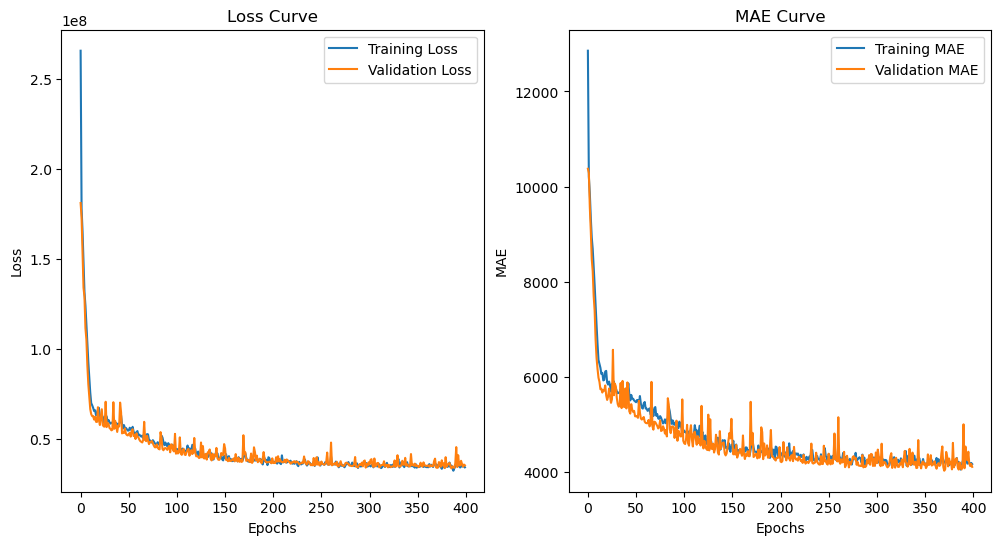

In [81]:
# Plot training and validation loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE curves
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

### SHAP to explain a few models

Validation MSE: 21171932.05
Validation R2: 0.82
Validation MAE: 3197.13


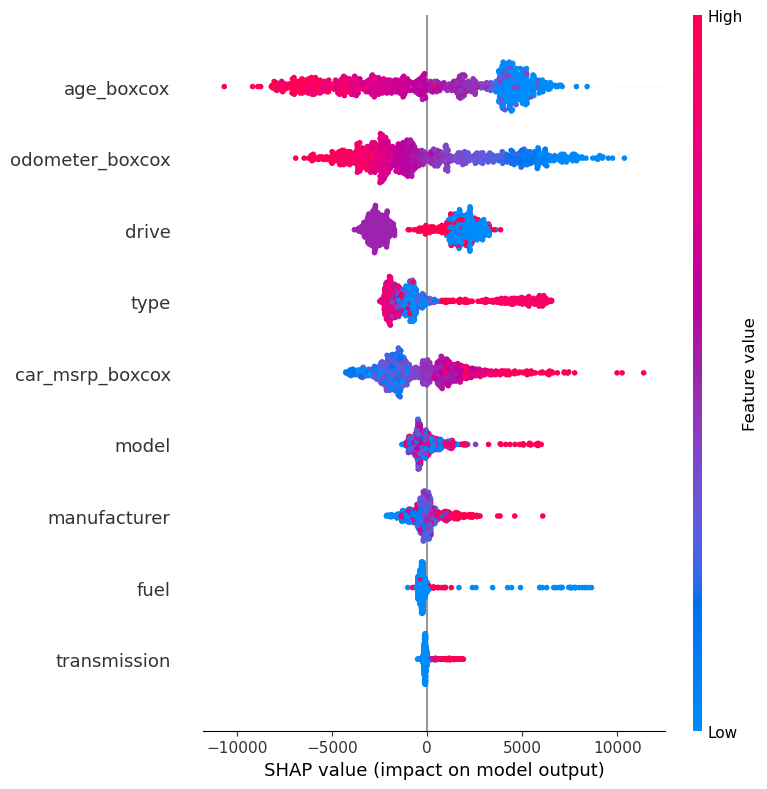

In [141]:
# SHAP on CatBoost
import shap
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train the CatBoost model with early stopping using the validation set
cbr_model = CatBoostRegressor(logging_level='Silent', early_stopping_rounds=10)
cbr_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

# Predict on the validation set
y_val_pred = cbr_model.predict(X_val)

# Evaluate model performance on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation R2: {val_r2:.2f}")
print(f"Validation MAE: {val_mae:.2f}")

# Predict on the test set
cbr_pred = cbr_model.predict(X_test)

# Use SHAP to explain the model
explainer_cbr = shap.TreeExplainer(cbr_model)
shap_values_cbr = explainer_cbr.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values_cbr, X_test, plot_size=(8, 8))

Validation MSE: 23820725.13
Validation R2: 0.79
Validation MAE: 3419.91


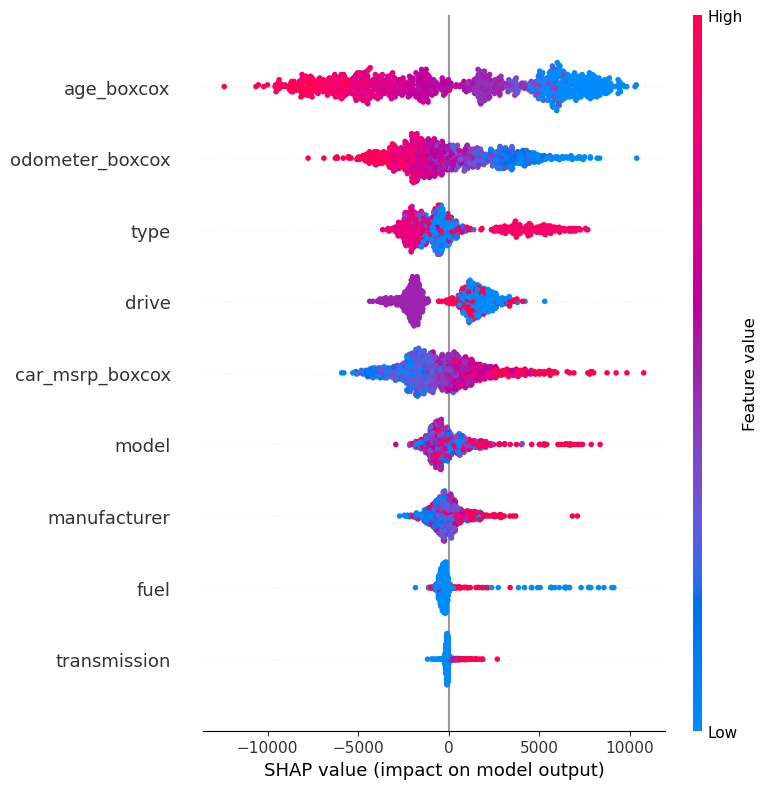

In [142]:
# SHAP on XGBoost
import shap
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the XGBoost model with early stopping using the validation set
xgb_model = XGBRegressor(objective='reg:squarederror', verbosity=0, early_stopping_rounds=10)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Predict on the validation set
y_val_pred = xgb_model.predict(X_val)

# Evaluate model performance on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation R2: {val_r2:.2f}")
print(f"Validation MAE: {val_mae:.2f}")

# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Use SHAP to explain the model
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values_xgb, X_test, plot_size=(8, 8))

### 4.Ensemble Learning
－Simple Averaging   
－Weighted Averaging(manually)  
－Voting  
－Stacking  


In [117]:
dtr_model = DecisionTreeRegressor()
rfr_model = RandomForestRegressor(n_estimators=124)
etr_model = ExtraTreesRegressor(n_estimators=124)
xbr_model = XGBRegressor(tree_method='hist', n_estimators=1000)
cbr_model = CatBoostRegressor(logging_level='Silent')
knr_model = KNeighborsRegressor(weights='distance')

### Averaging
1. Simple Average
2. Weighted Average

In [118]:
%%time

print('Fitting the Decision Tree model...\n')
dtr_model.fit(X_train, y_train)

print('Fitting the Random Forest model...\n')
rfr_model.fit(X_train, y_train)

print('Fitting the Extra Trees model...\n')
etr_model.fit(X_train, y_train)

print('Fitting the XGBRegressor model...\n')
xbr_model.fit(X_train, y_train)

print('Fitting the CatBoostRegressor model...\n')
cbr_model.fit(X_train, y_train)

print('Fitting the KNeighborsRegressor model...\n')
knr_model.fit(X_train, y_train)

Fitting the Decision Tree model...

Fitting the Random Forest model...

Fitting the Extra Trees model...

Fitting the XGBRegressor model...

Fitting the CatBoostRegressor model...

Fitting the KNeighborsRegressor model...

CPU times: total: 29.1 s
Wall time: 8.43 s


KNeighborsRegressor(weights='distance')

In [119]:
%%time

dtr_pred = dtr_model.predict(X_test)
rfr_pred = rfr_model.predict(X_test)
etr_pred = etr_model.predict(X_test)
xbr_pred = xbr_model.predict(X_test)
cbr_pred = cbr_model.predict(X_test)
knr_pred = knr_model.predict(X_test)

CPU times: total: 203 ms
Wall time: 104 ms


In [120]:
# 1. Simple Average
sum_preds = dtr_pred + rfr_pred + etr_pred + xbr_pred + cbr_pred + knr_pred
pred_final = np.round(sum_preds / 6)

print(Back.RED + Fore.BLACK + Style.BRIGHT + 'Simple Averaging Performance' + Back.RESET)

print(f"{Fore.BLUE}Test R2-Score: {Fore.RED}{r2_score(y_test, pred_final):.3f}")
print(f"{Fore.BLUE}Test MAE:      {Fore.RED}{mean_absolute_error(y_test, pred_final):.3f}")

Simple Averaging Performance
Test R2-Score: 0.805
Test MAE:      3200.689


In [132]:
# Define the weights for each model
xbr_weight = 0.3  # XGBoost 
cbr_weight = 0.45  # CatBoost 
rfr_weight = 0.1  # Random Forest 
etr_weight = 0.1  # Extra Trees 
knr_weight = 0.025 # K-Nearest Neighbors 
dtr_weight = 0.025 # Decision Tree 


pred_final_w = np.round(
    xbr_weight * xbr_pred +
    cbr_weight * cbr_pred +
    rfr_weight * rfr_pred +
    etr_weight * etr_pred +
    knr_weight * knr_pred +
    dtr_weight * dtr_pred
)

In [134]:
# 2. Weighted Average

print(Back.RED + Fore.BLACK + Style.BRIGHT + 'Weighted Averaging Performance' + Back.RESET)

print(f"{Fore.BLUE}Test R2-Score: {Fore.RED}{r2_score(y_test, pred_final_w):.3f}")
print(f"{Fore.BLUE}Test MAE:      {Fore.RED}{mean_absolute_error(y_test, pred_final_w):.3f}")

Weighted Averaging Performance
Test R2-Score: 0.819
Test MAE:      3032.123


### Voting

In [137]:
%%time

estimators = [('dtr', dtr_model), ('rfr', rfr_model), ('etr', etr_model),
              ('xbr', xbr_model), ('cbr', cbr_model), ('knr', knr_model)]

voting_model = VotingRegressor(estimators=estimators)

voting_model.fit(X_train, y_train)

voting_pred = voting_model.predict(X_test)

CPU times: total: 29.1 s
Wall time: 8.24 s


In [138]:
print(Back.RED + Fore.BLACK + Style.BRIGHT + 'Voting Performance' + Back.RESET)

print(f"{Fore.BLUE}Test R2-Score: {Fore.RED}{r2_score(y_test, voting_pred):.3f}")
print(f"{Fore.BLUE}Test MAE:      {Fore.RED}{mean_absolute_error(y_test, voting_pred):.3f}")

Voting Performance
Test R2-Score: 0.806
Test MAE:      3206.145


### Stacking

In [139]:
%%time

final_estimator = GradientBoostingRegressor(random_state=666)

stacking_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

stacking_model.fit(X_train, y_train)

stacking_pred = stacking_model.predict(X_test)

CPU times: total: 2min 55s
Wall time: 47.8 s


In [140]:
print(Back.RED + Fore.BLACK + Style.BRIGHT + 'Stacking Performance' + Back.RESET)

print(f"{Fore.BLUE}Test R2-Score: {Fore.RED}{r2_score(y_test, stacking_pred):.3f}")
print(f"{Fore.BLUE}Test MAE:      {Fore.RED}{mean_absolute_error(y_test, stacking_pred):.3f}")

Stacking Performance
Test R2-Score: 0.824
Test MAE:      2992.233


## Conclusion 

In this notebook, we analyzed a dataset of used cars and additionally performed web scraping to obtain the original MSRP of the vehicles.
We then attempted to predict the price of a used car based on several features.
A deep neural network (DNN) and several regression models were employed for this task. The CatBoost model offered the best performance.
We subsequently used the SHAP framework to explain two of our models.
Finally, different ensemble learning techniques were applied.
This approach outperformed the others, both in terms of R2 score and mean absolute error (MAE).